In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

/Users/abhigyaurja/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/abhigyaurja/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/abhigyaurja/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/abhigyaurja/opt/anaconda3/lib/python3.7/site-

In [2]:
time0 = time.time()

In [3]:
#Getting the Data
(x_train,Y_train),(x_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Processing the Data

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
Y_train = Y_train.reshape(Y_train.shape[0],1)

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
Classes = 10
#Converting into One Hot Vector
y_train = np.zeros([Y_train.shape[0], Classes])
for i in range(Y_train.shape[0]):
        y_train[i][Y_train[i]] = 1

y_test = np.zeros([Y_test.shape[0], Classes])
for i in range(Y_test.shape[0]):
        y_test[i][Y_test[i]] = 1

# Defining the Model

In [7]:
cnnmodel = tf.keras.Sequential()
#Defining the input shape in the first layer of the model

cnnmodel.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) 
#Maxpooling
cnnmodel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#Adding Dropout
cnnmodel.add(tf.keras.layers.Dropout(0.25))
#Adding more layers
cnnmodel.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
cnnmodel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnnmodel.add(tf.keras.layers.Dropout(0.25))
#Adding fully connected layers
cnnmodel.add(tf.keras.layers.Flatten())
cnnmodel.add(tf.keras.layers.Dense(512, activation='relu'))
cnnmodel.add(tf.keras.layers.Dropout(0.5))
#Final output
cnnmodel.add(tf.keras.layers.Dense(10, activation='softmax'))

#Model Summary
cnnmodel.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________

In [0]:
#Compiling the model and defining loss and optimizer
cnnmodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training 

In [9]:
#Training the model 
cnnmodel.fit(x_train, y_train, batch_size=64, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 161us/sample - loss: 1.0593 - acc: 0.6102
Epoch 2/30
60000/60000 [==============================] - 8s 137us/sample - loss: 0.7021 - acc: 0.7382
Epoch 3/30
60000/60000 [==============================] - 8s 137us/sample - loss: 0.6222 - acc: 0.7695
Epoch 4/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5634 - acc: 0.7910
Epoch 5/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.5258 - acc: 0.8058
Epoch 6/30
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4953 - acc: 0.8180
Epoch 7/30
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4754 - acc: 0.8253
Epoch 8/30
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4544 - acc: 0.8346
Epoch 9/30
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4405 - acc: 0.8378
Epoch 10/30
60000/60000 [========================

In [10]:
#Evaluating the model
accuracy_test = cnnmodel.evaluate(x_test, y_test, verbose=0)
accuracy_train = cnnmodel.evaluate(x_train, y_train, verbose=0)

#Printing test accuracy
print('Test accuracy is :', '{:.2f}'.format(accuracy_test[1]*100))
#Printing training accuracy
print('Train accuracy is :', '{:.2f}'.format(accuracy_train[1]*100))

Test accuracy is : 89.49
Train accuracy is : 90.89


In [0]:
time1 = time.time()

In [12]:
print("Time taken = ", '{:.3f}'.format((time1-time0)/60), "minutes")

Time taken =  4.283 minutes


# Visualizing Predictions

In [0]:
pred = cnnmodel.predict(x_test)

In [0]:
Predicted = np.zeros(pred.shape[0])
for i in range(pred.shape[0]):
    Predicted[i] = np.argmax(pred[i][:])

Expected = np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    Expected[i] = np.argmax(y_test[i][:])
    
for i in range(pred.shape[0]):
    if Predicted[i] == Expected[i]:
        same = i
    else:
        diff = i
        break    

In [0]:
test_image = x_test.reshape(x_test.shape[0], x_test.shape[1],x_test.shape[2])

Predicted =  7.0
Expected =  7.0


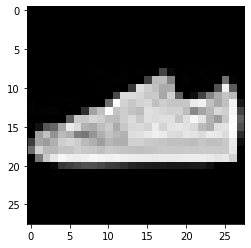

In [16]:
print("Predicted = ", Predicted[same])
print("Expected = ", Expected[same])
plt.imshow(test_image[same], cmap = 'gray')

Predicted =  5.0
Expected =  9.0


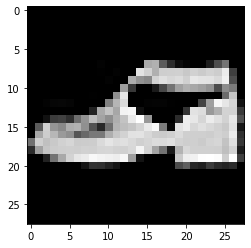

In [17]:
print("Predicted = ", Predicted[diff])
print("Expected = ", Expected[diff])
plt.imshow(test_image[diff], cmap = 'gray')